## How important is feature selection?
Top reasons to use feature selection are: 
- It enables the machine learning algorithm to train faster. 
- It reduces the complexity of a model and makes it easier to interpret. 
- It improves the accuracy of a model if the right subset is chosen.

### Importing libraries and the dataset

In [1]:
#Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # plotting library
import missingno as msno # plotting missing data
import seaborn as sns # plotting library
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.impute import SimpleImputer #for handling missing data
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Importing the dataset
dataset = pd.read_csv(r'C:\Users\Vivek 6666\Downloads\train.csv')

In [3]:
#Show first 5 rows
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Histograms of numerical data


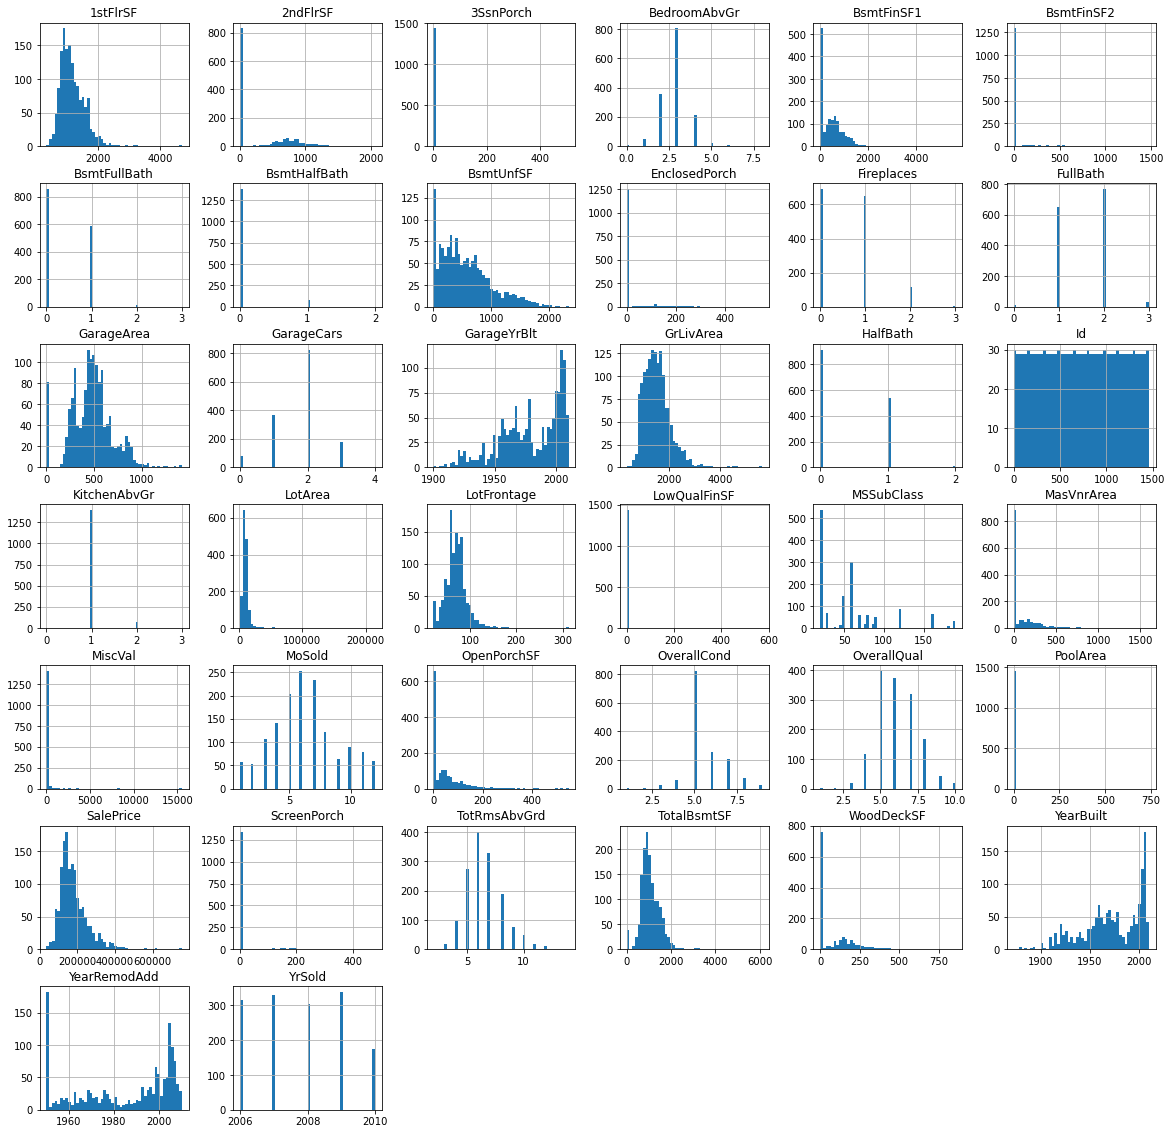

In [4]:
#setup  Matplotlib (magic function) . Plots will render within the notebook itself
%matplotlib inline  
dataset.hist(bins = 50 , figsize = (20,20))
plt.show()

### Taking care of missing data and one hot encording category features

In [5]:
#checking missing values by column
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

#### Dropping columns which have too many missing values to be useful. Also droping ID because it's useless to the model

In [6]:
dataset = dataset.drop(['Id','LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)
#Get column count
len(dataset.columns)

74

After dropping columns there are 74 columns.

Let's keep the rows where it has data for at least 70 of it's features and drop the other rows because other rows will be missing data from 4 or more features .

In [7]:
dataset = dataset.dropna(thresh=70) 

In [8]:
#Separating Independent & Dependant Varibles
X = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1] #Dependant Varible (SalePrice)
X.head() #show first 5 records

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal


In [9]:
y[0:5] #show first 5 records


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [10]:
#One Hot Encoding
X = pd.get_dummies(data = X , columns=['MSZoning' ,'Street','LotShape','LandContour','Utilities','LotConfig','LandSlope'
                                                   ,'Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
                                                   'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
                                                   'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                                                   'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','SaleType','SaleCondition',
                                                   'KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive'] , drop_first = True )

X.head() #show first 5 records

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,1,0,1
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,1,0,1
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,1,0,1
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,0,0,0,1,0,1
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,1,0,1


In [11]:
#Imputer class. 
X = X.fillna(X.median())

#### Splitting the dataset into the Training set and Test set



In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)

We are going to use k-fold cross validation



####  Linear Regression

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Predicting the SalePrices using test set 
y_pred_lr = lin_reg.predict(X_test)

# Linear Regression Accuracy with test set
accuracy_lf = metrics.r2_score(y_test, y_pred_lr)
print('Linear Regression Accuracy: ', accuracy_lf)

#Predicting the SalePrice using cross validation (KFold method)
y_pred_kf_lr = cross_val_predict(lin_reg, X, y, cv=10 )

#Linear Regression Accuracy with cross validation (KFold method)
accuracy_lf = metrics.r2_score(y, y_pred_kf_lr)
print('Cross-Predicted(KFold) Linear Regression Accuracy: ', accuracy_lf)

Linear Regression Accuracy:  0.22257141992645946
Cross-Predicted(KFold) Linear Regression Accuracy:  0.6626455470816741


R Squared is 0.22 . That's lower than 0.5 .This model is not good


#### Decision Tree Regression



In [14]:
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train,y_train)

#Predicting the SalePrices using test set 
y_pred_dt = dt_regressor.predict(X_test)

#Decision Tree Regression Accuracy with test set
print('Decision Tree Regression Accuracy: ', dt_regressor.score(X_test,y_test))

#Predicting the SalePrice using cross validation (KFold method)
y_pred_dt = cross_val_predict(dt_regressor, X, y, cv=10 )
#Decision Tree Regression Accuracy with cross validation
accuracy_dt = metrics.r2_score(y, y_pred_dt)
print('Cross-Predicted(KFold) Decision Tree Regression Accuracy: ', accuracy_dt)

Decision Tree Regression Accuracy:  0.6463249473556419
Cross-Predicted(KFold) Decision Tree Regression Accuracy:  0.7542335393639856


R Squared is 0.64 . This model is better than linear regression model

#### Random Forest Regression

In [15]:
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X_train,y_train)

#Predicting the SalePrices using test set 
y_pred_rf = rf_regressor.predict(X_test)

#Random Forest Regression Accuracy with test set
print('Random Forest Regression Accuracy: ', rf_regressor.score(X_test,y_test))

#Predicting the SalePrice using cross validation (KFold method)
y_pred_rf = cross_val_predict(rf_regressor, X, y, cv=10 )

#Random Forest Regression Accuracy with cross validation
accuracy_rf = metrics.r2_score(y, y_pred_rf)
print('Cross-Predicted(KFold) Random Forest Regression Accuracy: ', accuracy_rf)

Random Forest Regression Accuracy:  0.8080018530783604
Cross-Predicted(KFold) Random Forest Regression Accuracy:  0.8557915088389981


R Squared is 0.84 . This model is the best model amoung the models we tried so far

#### Does feature importance add up to 1?
So, in some sense the feature importances of a single tree are percentages. 
- They sum to one and describe how much a single feature contributes to the tree's total impurity reduction. 
- The feature importances of a Random Forest are computed as the average of importances over all trees

### Let's find what features are most important

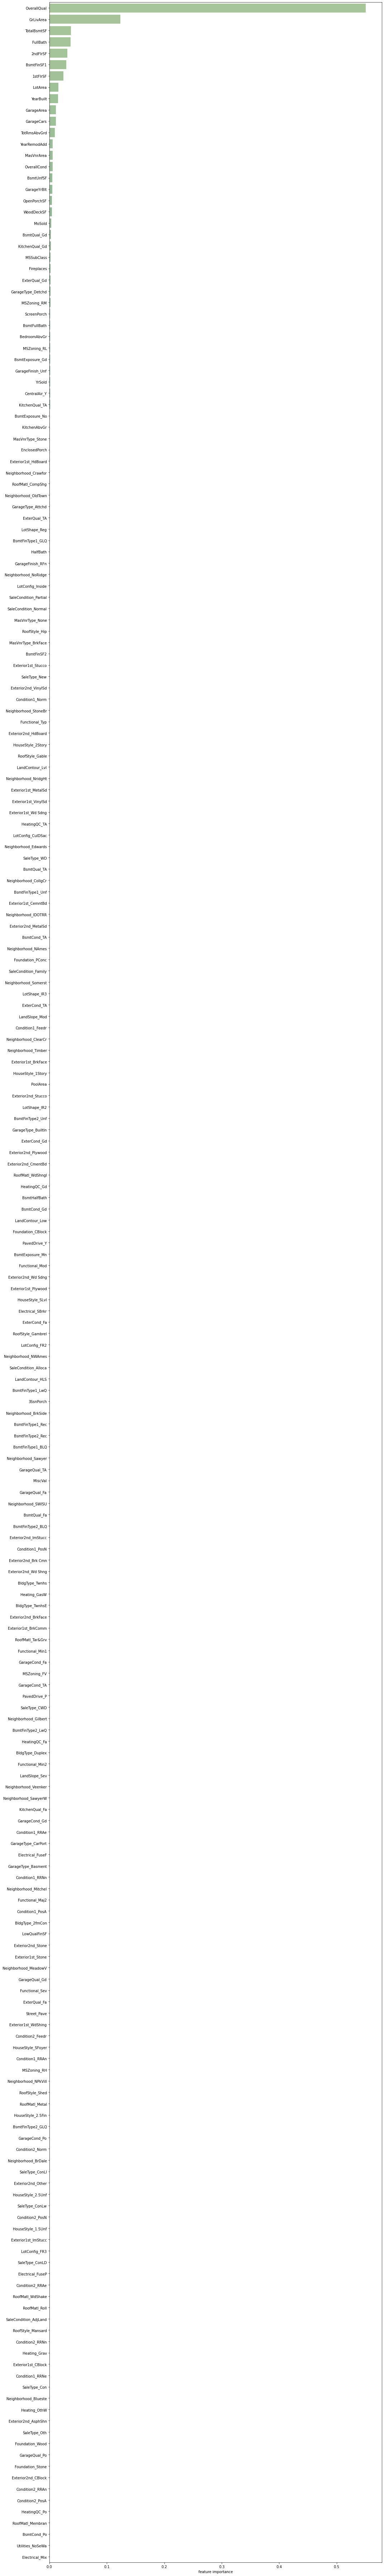

In [16]:
ranking = np.argsort(-rf_regressor.feature_importances_)
f, ax = plt.subplots(figsize=(15, 100))
sns.barplot(x=rf_regressor.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h',palette="crest")
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

Keep 30 most dominant features



In [17]:
X_train = X_train.iloc[:,ranking[:30]]
X_test = X_test.iloc[:,ranking[:30]]

#### Linear Regression
Let's re-run the Linear Regression to check if removing the less dominant features improved the model

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Predicting the SalePrices using test set 
y_pred_lr = lin_reg.predict(X_test)

# Linear Regression Accuracy with test set
accuracy_lf = metrics.r2_score(y_test, y_pred_lr)
print('Linear Regression Accuracy: ', accuracy_lf)

#Predicting the SalePrice using cross validation (KFold method)
y_pred_kf_lr = cross_val_predict(lin_reg, X, y, cv=10 )

#Linear Regression Accuracy with cross validation (KFold method)
accuracy_lf = metrics.r2_score(y, y_pred_kf_lr)
print('Cross-Predicted(KFold) Linear Regression Accuracy: ', accuracy_lf)

Linear Regression Accuracy:  0.7547448412319852
Cross-Predicted(KFold) Linear Regression Accuracy:  0.6626455470816741


Before reducing the less dominant features  linear regression accuracy was 0.22 . After reducing features it's 0.75 . Tha's a big improvement

#### Decision Tree Regression

In [19]:
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train,y_train)

#Predicting the SalePrices using test set 
y_pred_dt = dt_regressor.predict(X_test)

#Decision Tree Regression Accuracy with test set
print('Decision Tree Regression Accuracy: ', dt_regressor.score(X_test,y_test))

#Predicting the SalePrice using cross validation (KFold method)
y_pred_dt = cross_val_predict(dt_regressor, X, y, cv=10 )
#Decision Tree Regression Accuracy with cross validation
accuracy_dt = metrics.r2_score(y, y_pred_dt)
print('Cross-Predicted(KFold) Decision Tree Regression Accuracy: ', accuracy_dt)

Decision Tree Regression Accuracy:  0.7389705485802305
Cross-Predicted(KFold) Decision Tree Regression Accuracy:  0.7542335393639856


Before reducing the less dominant features Decision Tree Regression accuracy was 0.64 . After reducing features it's 0.73 . It's quite an improvement.

### Before feature selection - 

- Linear Regression Accuracy:  0.22257141992645946
- Decision Tree Regression Accuracy:  0.6463249473556419
- Random Forest Regression Accuracy:  0.8080018530783604
    
### After feature selection - 

- Linear Regression Accuracy:  0.7547448412319852
- Decision Tree Regression Accuracy:  0.7389705485802305